---
title: "의사결정나무 | 교호작용"
author: "강신성"
date: "2023-10-18"
categories: [python, Tree]
---




> 의사결정나무(`tree.DiscussionTreeRegressor()`)를 사용해서 교호작용을 반영해보자.

## 1. 라이브러리 imports

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn.linear_model
import sklearn.tree

## 2. Data

In [14]:
df_train = pd.read_csv('https://raw.githubusercontent.com/guebin/MP2023/main/posts/weightloss.csv')
df_train

,Supplement,Exercise,Weight_Loss
0,False,False,-0.877103
1,True,False,1.604542
2,True,True,13.824148
3,True,True,13.004505
4,True,True,13.701128
...,...,...,...
9995,True,False,1.558841
9996,False,False,-0.217816
9997,False,True,4.072701
9998,True,False,-0.253796


In [5]:
df_train.pivot_table(index='Supplement',columns='Exercise',values='Weight_Loss')

Exercise,False,True
Supplement,,
False,0.021673,4.991314
True,0.497573,14.966363


> 운동과 체중감량보조제를 병행하면 시너지가 나는 것 같다.

## 3. 사전 설명

\- 변수를 추가할수록

언더피팅 ---> 잘 적합 ---> 오버피팅

* 실제로 교호작용이 있는데 교호작용을 고려하지 않으면... -> 언더피팅
* 실제로 교호작용이 있고, 교호작용을 고려했다면... -> 잘했지

* 실제로 교호작용이 없는데 교호작용을 고려하지 않았다면... -> 잘했지2
* 없는데 고려했다면... -> 오버피팅

## 4. 분석

\- 분석 1 : 선형회귀 (교호작용 고려 X)

In [8]:
# step 1
X = df_train[['Supplement', 'Exercise']]
y = df_train['Weight_Loss']  ## 반응변수는 1차원을 넣어야함

# step 2
predictr = sklearn.linear_model.LinearRegression()

# step 3
predictr.fit(X, y)

# step 4
df_train['Weight_Loss_hat'] = predictr.predict(X)

In [9]:
df_train.pivot_table(index = 'Supplement', columns = 'Exercise', values = 'Weight_Loss')

Exercise,False,True
Supplement,,
False,0.021673,4.991314
True,0.497573,14.966363


In [10]:
df_train.pivot_table(index = 'Supplement', columns = 'Exercise', values = 'Weight_Loss_hat')

Exercise,False,True
Supplement,,
False,-2.373106,7.374557
True,2.845934,12.593598


> 다를 수밖에...

\- 분석2 : 의사결정나무

In [15]:
# step 1
X,y = df_train[['Supplement','Exercise']], df_train['Weight_Loss']
# step 2 
predictr = sklearn.tree.DecisionTreeRegressor()  ## 여기만 다름
# step 3 
predictr.fit(X,y)
# step 4 
df_train['Weight_Loss_hat'] = predictr.predict(X)

In [16]:
df_train.pivot_table(index='Supplement',columns='Exercise',values='Weight_Loss_hat')

Exercise,False,True
Supplement,,
False,0.021673,4.991314
True,0.497573,14.966363


> 뭔데 이래 자동으로 분석해주는데? 게다가 잘함.

## 5. 다른 예제

### **A. Data**
---




\- 아이스크림 종류와 온도 별 판매량

In [17]:
np.random.seed(43052)
temp = pd.read_csv('https://raw.githubusercontent.com/guebin/DV2022/master/posts/temp.csv').iloc[:,3].to_numpy()[:100]
temp.sort()
choco = 40 + temp * 2.0 + np.random.randn(100)*3
vanilla = 60 + temp * 5.0 + np.random.randn(100)*3
df1 = pd.DataFrame({'temp':temp,'sales':choco}).assign(type='choco')
df2 = pd.DataFrame({'temp':temp,'sales':vanilla}).assign(type='vanilla')
df_train = pd.concat([df1,df2])
df_train

,temp,sales,type
0,-4.1,32.950261,choco
1,-3.7,35.852524,choco
2,-3.0,37.428335,choco
3,-1.3,38.323681,choco
4,-0.5,39.713362,choco
...,...,...,...
95,12.4,119.708075,vanilla
96,13.4,129.300464,vanilla
97,14.7,136.596568,vanilla
98,15.0,136.213140,vanilla


### **B. 분석 1 : 기본적 선형 회귀**
---




In [24]:
# step1
X = pd.get_dummies(df_train[['temp','type']],drop_first=True)  ## 범주형 자료 처리
y = df_train['sales']

# step2 
predictr = sklearn.linear_model.LinearRegression()

# step3
predictr.fit(X,y)

# step4 
df_train['sales_hat'] = predictr.predict(X)

#---#
f'train score = {predictr.score(X,y):.4f}'

'train score = 0.9250'

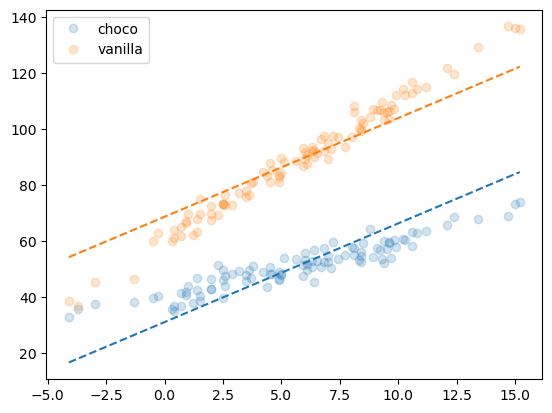

In [25]:
plt.plot(df_train.temp[df_train.type=='choco'],df_train.sales[df_train.type=='choco'],'o',alpha=0.2,label='choco')
plt.plot(df_train.temp[df_train.type=='choco'],df_train.sales_hat[df_train.type=='choco'],'--',color='C0')
plt.plot(df_train.temp[df_train.type=='vanilla'],df_train.sales[df_train.type=='vanilla'],'o',alpha=0.2,label='vanilla')
plt.plot(df_train.temp[df_train.type=='vanilla'],df_train.sales_hat[df_train.type=='vanilla'],'--',color='C1')
plt.legend()

> 언더피팅된 상황

### **C. 분석 2 : 의사결정나무**
---




In [22]:
# step1
X = pd.get_dummies(df_train[['temp','type']],drop_first=True)  ## 범주형 자료 처리
y = df_train['sales']

# step2 
predictr = sklearn.tree.DecisionTreeRegressor()  ## 의사결정나무 사용

# step3
predictr.fit(X,y)

# step4 
df_train['sales_hat'] = predictr.predict(X)

#---#
f'train score = {predictr.score(X,y):.4f}'

'train score = 0.9964'

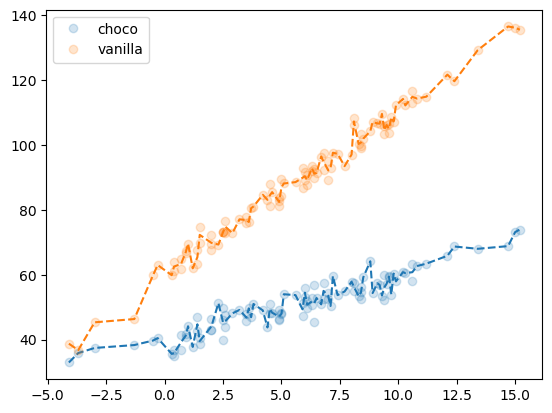

In [23]:
plt.plot(df_train.temp[df_train.type=='choco'],df_train.sales[df_train.type=='choco'],'o',alpha=0.2,label='choco')
plt.plot(df_train.temp[df_train.type=='choco'],df_train.sales_hat[df_train.type=='choco'],'--',color='C0')
plt.plot(df_train.temp[df_train.type=='vanilla'],df_train.sales[df_train.type=='vanilla'],'o',alpha=0.2,label='vanilla')
plt.plot(df_train.temp[df_train.type=='vanilla'],df_train.sales_hat[df_train.type=='vanilla'],'--',color='C1')
plt.legend()

> 이건 오버피팅됨

* 교수님 개념

> 통계에서 "관측치 = 언더라잉(선형~(아무튼!)~의 추측치) + 랜덤"이라 할 수 있다. 모형이 설명해야 할 영역은 언더라잉이다.(단순선형회귀에서 보면 설명하는 것은 조건부 기댓값인 직선이고, 남는 건 오차니까...)
>
> 모형이 언더라잉을 잘 설명하지 못한다면 언더피팅이고(피팅을 잘 못함), 주어진 모형이 언더라잉을 넘어 오차항까지 설명하려 하고 있다면~(너무 의욕만 넘침...)~ 오버피팅이다.

    1. 마음속의 underlying(회귀직선)을 간직한다.
    2. 그 underlying보다 잘 맞추면 오버피팅이다.
    3. 내 마음속의 underlying이 제대로 학습을 못하고 있다고 판단되면, 모형 자체가 틀렸거나 언더피팅이다.

*이에 대한 기준은 좀 주관적이라 사람마다 다를 수 있어요~*

이러한 논리에 따라 위의 의사결정나무로 적합된 결과는 오버피팅이다.(그치만 언더피팅보단 나은 것 같기도?)

\- 언더피팅이다 <=> 모형의 표현력이 부족하다 <=> 맞춰야할 것을 제대로 못잡아낸다 <=> 데이터의 특징을 잘 잡아내지 못한다.

\- 오버피팅이다 <=> 모형의 표현력이 너무 풍부하다 <=> 표현력이 너무 좋아서 표현하지 말아야 할 오차항도 표현한다 <=> 데이터의 특징만 잡는게 아니고, 오차항의 특징까지 잡아낸다

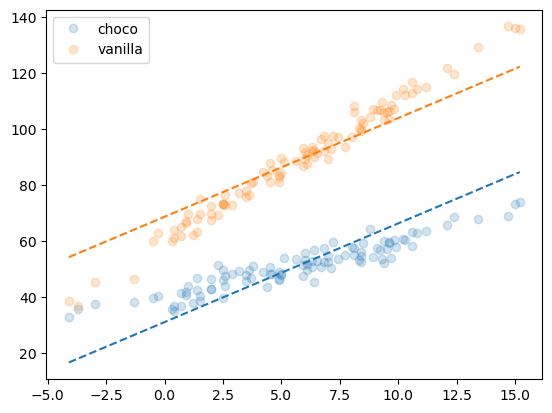

In [26]:
#

> 마음속의 언더라잉(직선)을 제대로 학습하지 못한 것 같으니 언더피팅이다.

(그래도 의사결정나무는 기울기라는 언더라잉은 잡아냈잖아?)